In [ ]:
#scipy----

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy as sp

In [19]:
#optimisation

In [2]:
from scipy.optimize import minimize

In [21]:
def f(x):
    return (x-3)**2
res=minimize(f,2)

In [22]:
res

      fun: 5.551437397369767e-17
 hess_inv: array([[0.5]])
      jac: array([-4.3254289e-13])
  message: 'Optimization terminated successfully.'
     nfev: 6
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([2.99999999])

In [23]:
res.x

array([2.99999999])

In [24]:
res.fun

5.551437397369767e-17

In [25]:
minimize(f,5)

      fun: 3.566296139491455e-16
 hess_inv: array([[0.5]])
      jac: array([-2.28681181e-08])
  message: 'Optimization terminated successfully.'
     nfev: 6
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([2.99999998])

In [26]:
f=lambda x:(x[0]-1)**2+(x[1]-2.5)**2

In [27]:
f([2,3])

1.25

In [28]:
cons = ({'type': 'ineq', 'fun': lambda x:  x[0] - 2 * x[1] + 2},
        {'type': 'ineq', 'fun': lambda x: -x[0] - 2 * x[1] + 6},
        {'type': 'ineq', 'fun': lambda x: -x[0] + 2 * x[1] + 2})
bnds = ((0, None), (0, None))

In [29]:
res=minimize(f,(2,0),bounds=bnds,constraints=cons)

In [30]:
res

     fun: 0.8000000011920985
     jac: array([ 0.80000002, -1.59999999])
 message: 'Optimization terminated successfully'
    nfev: 10
     nit: 3
    njev: 3
  status: 0
 success: True
       x: array([1.4, 1.7])

In [31]:
minimize? #for diff type of minimization

SyntaxError: invalid syntax (<ipython-input-31-28204e4bd1a3>, line 1)

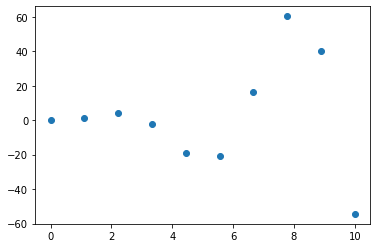

In [32]:
#interpolation
x=np.linspace(0,10,10)
y=x**2*np.sin(x)
plt.scatter(x,y)

In [33]:
from scipy.interpolate import interp1d
f=interp1d(x,y,kind='linear')
xv=np.linspace(0,10,100)
yv=f(xv)

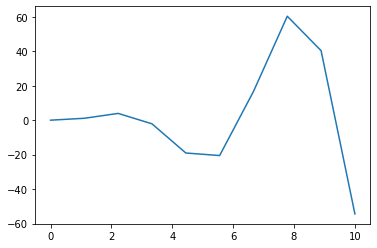

In [34]:
plt.plot(xv,yv)


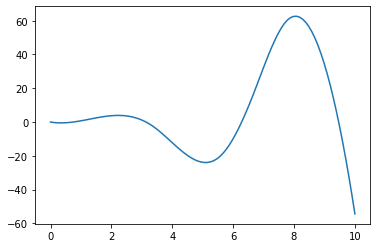

In [35]:
from scipy.interpolate import interp1d
f=interp1d(x,y,kind='cubic')
xv=np.linspace(0,10,100)
yv=f(xv)
plt.plot(xv,yv)

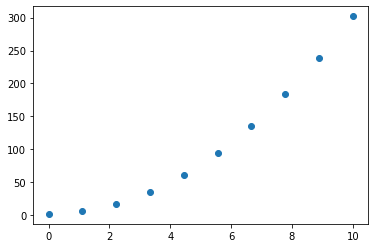

In [36]:
x_data=np.linspace(0,10,10)
y_data=3*x_data**2+2
plt.scatter(x_data,y_data)

In [3]:
from scipy.optimize import curve_fit

In [38]:
def func(x,a,b):
    return a*x**2+b
#popt--optimal of p, pcov--covarience of parameter , p0--initial guess
popt ,pcov= curve_fit(func, x_data,y_data,p0=(1,1))

In [39]:
popt #a=3,b=2

array([3., 2.])

In [40]:
pcov #error and relate with parameter

array([[ 4.13297331e-34, -1.45419433e-32],
       [-1.45419433e-32,  9.65872308e-31]])

In [42]:
t_data = np.array([ 0.   ,  0.34482759,  0.68965517,  1.03448276,  1.37931034,
        1.72413793,  2.06896552,  2.4137931 ,  2.75862069,  3.10344828,
        3.44827586,  3.79310345,  4.13793103,  4.48275862,  4.82758621,
        5.17241379,  5.51724138,  5.86206897,  6.20689655,  6.55172414,
        6.89655172,  7.24137931,  7.5862069 ,  7.93103448,  8.27586207,
        8.62068966,  8.96551724,  9.31034483,  9.65517241, 10.        ])
y_data = np.array([ 4.3303953 ,  1.61137995, -2.15418696, -3.90137249, -1.67259042,
        2.16884383,  3.86635998,  1.85194506, -1.8489224 , -3.96560495,
       -2.13385255,  1.59425817,  4.06145238,  1.89300594, -1.76870297,
       -4.26791226, -2.46874133,  1.37019912,  4.24945607,  2.27038039,
       -1.50299303, -3.46774049, -2.50845488,  1.20022052,  3.81633703,
        2.91511556, -1.24569189, -3.72716214, -2.54549857,  0.87262548])

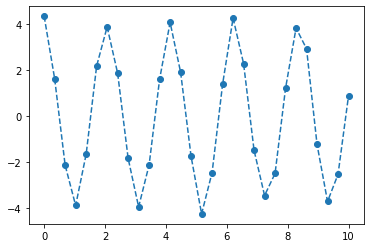

In [43]:
plt.plot(t_data,y_data,'o--')

In [44]:
def func(t,a,w,phi):
    return a*np.cos(w*t+phi)

In [79]:
popt,pcov=curve_fit(func,t_data,y_data,p0=(4,np.pi,0))

In [80]:
popt

array([3.94836219, 2.99899521, 0.10411352])

In [81]:
a,w,phi=popt

In [82]:
a

3.9483621862620235

In [83]:
pcov

array([[ 2.61882717e-03, -4.94131505e-06,  3.47404558e-05],
       [-4.94131505e-06,  1.85637335e-05, -9.60755036e-05],
       [ 3.47404558e-05, -9.60755036e-05,  6.63423791e-04]])

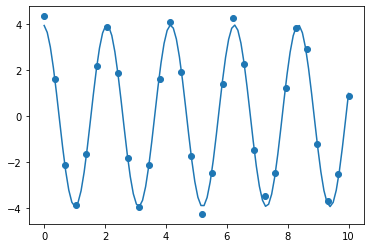

In [84]:
t=np.linspace(0,10,100)
y=func(t,a,w,phi)
plt.plot(t,y)
plt.scatter(t_data,y_data)

In [51]:
#eror
pcov

array([[ 2.61882717e-03, -4.94131505e-06,  3.47404558e-05],
       [-4.94131505e-06,  1.85637335e-05, -9.60755036e-05],
       [ 3.47404558e-05, -9.60755036e-05,  6.63423791e-04]])

In [52]:
np.diag(pcov)#variance of a , w, phi

array([2.61882717e-03, 1.85637335e-05, 6.63423791e-04])

In [53]:
np.sqrt(np.diag(pcov)) # sd of my assumption

array([0.05117448, 0.00430857, 0.02575701])

In [85]:
#special function --legendre polynomial

In [ ]:
#derivative

In [4]:
from scipy.misc import derivative

In [88]:
def f(x):
     return x**2*np.sin(2*x)*np.exp(-x)
x=np.linspace(0,1,100)

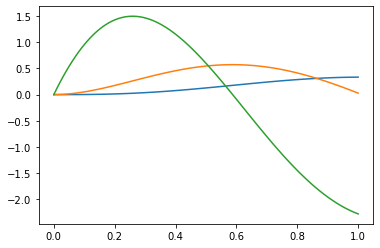

In [93]:
derivative(f,x,dx=1e-6)
plt.plot(x,f(x))
plt.plot(x, derivative(f,x,dx=1e-6))
plt.plot(x, derivative(f,x,dx=1e-6,n=2))#2nd dreivative

In [5]:
#intigration
from scipy.integrate import quad

In [97]:
integrand= lambda x: x**2*np.sin(2*x)*np.exp(-x)
integral,intigral_error=quad(integrand,0,1)

In [98]:
integral

0.14558175869954834

In [101]:
from scipy.integrate import dblquad
integrand= lambda x,y: np.sin(x+y**2)
lwr_y= lambda x: -x
upr_y= lambda x: x**2
integral,integral_error=dblquad(integrand,0,1,lwr_y,upr_y)

In [102]:
integral

0.315802507240474

In [103]:
integral_error

1.5634600713498928e-14

In [104]:
from scipy.integrate import nquad

In [105]:
nquad?

In [106]:
# diffential eqn

In [6]:
from scipy.integrate import odeint

In [108]:
def dvdt(v,t):
    return 3*v**2-5
v0=0

In [109]:
t=np.linspace(0,1,100)
sol=odeint(dvdt,v0,t)

In [110]:
sol

array([[ 0.        ],
       [-0.05047933],
       [-0.10080451],
       [-0.15082334],
       [-0.20038726],
       [-0.24935318],
       [-0.29758502],
       [-0.34495519],
       [-0.39134576],
       [-0.43664948],
       [-0.48077056],
       [-0.52362515],
       [-0.56514164],
       [-0.60526086],
       [-0.6439356 ],
       [-0.68113064],
       [-0.71682205],
       [-0.75099661],
       [-0.78365109],
       [-0.8147914 ],
       [-0.84443176],
       [-0.87259378],
       [-0.89930556],
       [-0.92460079],
       [-0.94851787],
       [-0.97109913],
       [-0.99239002],
       [-1.01243837],
       [-1.03129376],
       [-1.04900692],
       [-1.06562918],
       [-1.081212  ],
       [-1.0958066 ],
       [-1.10946355],
       [-1.12223249],
       [-1.13416195],
       [-1.14529906],
       [-1.15568941],
       [-1.16537698],
       [-1.17440397],
       [-1.18281086],
       [-1.19063623],
       [-1.19791686],
       [-1.20468768],
       [-1.21098179],
       [-1

In [111]:
sol.T

array([[ 0.        , -0.05047933, -0.10080451, -0.15082334, -0.20038726,
        -0.24935318, -0.29758502, -0.34495519, -0.39134576, -0.43664948,
        -0.48077056, -0.52362515, -0.56514164, -0.60526086, -0.6439356 ,
        -0.68113064, -0.71682205, -0.75099661, -0.78365109, -0.8147914 ,
        -0.84443176, -0.87259378, -0.89930556, -0.92460079, -0.94851787,
        -0.97109913, -0.99239002, -1.01243837, -1.03129376, -1.04900692,
        -1.06562918, -1.081212  , -1.0958066 , -1.10946355, -1.12223249,
        -1.13416195, -1.14529906, -1.15568941, -1.16537698, -1.17440397,
        -1.18281086, -1.19063623, -1.19791686, -1.20468768, -1.21098179,
        -1.21683053, -1.22226349, -1.22730856, -1.23199199, -1.23633849,
        -1.24037122, -1.24411192, -1.24758094, -1.25079735, -1.25377896,
        -1.25654241, -1.25910322, -1.2614759 , -1.26367394, -1.26570992,
        -1.26759557, -1.26934179, -1.27095869, -1.27245574, -1.27384168,
        -1.27512464, -1.2763122 , -1.27741137, -1.2

In [115]:
v_sol=sol.T[0]

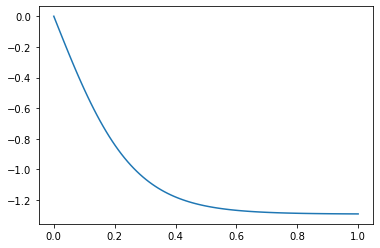

In [116]:
plt.plot(t,v_sol)

In [118]:
def dSdx(S,x):
    y1,y2=S
    return [y1+y2**2+3*x,
           3*y1+y2**3-np.cos(x)]

In [119]:
y1_0=0
y2_0=0
S_0=(y1_0,y2_0)

In [120]:
x=np.linspace(0,1,100)
sol=odeint(dSdx,S_0,x)

In [121]:
sol

array([[ 0.00000000e+00,  0.00000000e+00],
       [ 1.53914061e-04, -1.00992734e-02],
       [ 6.19093356e-04, -2.01882005e-02],
       [ 1.40076628e-03, -3.02563164e-02],
       [ 2.50418953e-03, -4.02930766e-02],
       [ 3.93464633e-03, -5.02878361e-02],
       [ 5.69744401e-03, -6.02298432e-02],
       [ 7.79789517e-03, -7.01082428e-02],
       [ 1.02413187e-02, -7.99120712e-02],
       [ 1.30330245e-02, -8.96302498e-02],
       [ 1.61783065e-02, -9.92515816e-02],
       [ 1.96824391e-02, -1.08764749e-01],
       [ 2.35506573e-02, -1.18158303e-01],
       [ 2.77881638e-02, -1.27420669e-01],
       [ 3.24001125e-02, -1.36540133e-01],
       [ 3.73915921e-02, -1.45504834e-01],
       [ 4.27676179e-02, -1.54302762e-01],
       [ 4.85331404e-02, -1.62921756e-01],
       [ 5.46930282e-02, -1.71349495e-01],
       [ 6.12520553e-02, -1.79573493e-01],
       [ 6.82148995e-02, -1.87581095e-01],
       [ 7.55861308e-02, -1.95359467e-01],
       [ 8.33702071e-02, -2.02895598e-01],
       [ 9.

In [123]:
sol.T

array([[ 0.00000000e+00,  1.53914061e-04,  6.19093356e-04,
         1.40076628e-03,  2.50418953e-03,  3.93464633e-03,
         5.69744401e-03,  7.79789517e-03,  1.02413187e-02,
         1.30330245e-02,  1.61783065e-02,  1.96824391e-02,
         2.35506573e-02,  2.77881638e-02,  3.24001125e-02,
         3.73915921e-02,  4.27676179e-02,  4.85331404e-02,
         5.46930282e-02,  6.12520553e-02,  6.82148995e-02,
         7.55861308e-02,  8.33702071e-02,  9.15714669e-02,
         1.00194121e-01,  1.09242251e-01,  1.18719801e-01,
         1.28630571e-01,  1.38978219e-01,  1.49766252e-01,
         1.60998020e-01,  1.72676732e-01,  1.84805434e-01,
         1.97387014e-01,  2.10424222e-01,  2.23919648e-01,
         2.37875730e-01,  2.52294784e-01,  2.67178978e-01,
         2.82530347e-01,  2.98350829e-01,  3.14642248e-01,
         3.31406342e-01,  3.48644774e-01,  3.66359140e-01,
         3.84551013e-01,  4.03221942e-01,  4.22373488e-01,
         4.42007253e-01,  4.62124894e-01,  4.82728181e-0

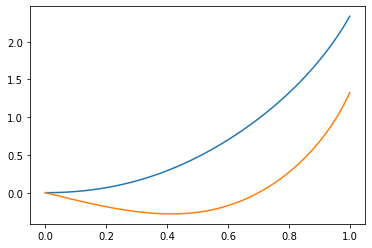

In [124]:
y1=sol.T[0]
y2=sol.T[1]
plt.plot(x,y1)
plt.plot(x,y2)

In [ ]:
# 2nd order = 2x 1st order

In [16]:
def dsdt(s,t):
    theta,omega=s
    return [omega,np.sin(theta)]

In [18]:
t=np.linspace(0,20,100)
s_0=[np.pi/4,0]
sol=odeint(dsdt,s_0,t)

In [ ]:
sol=odeint(dsdt,s_0,t)
plt.plot
